In [1]:
'''
Feature statistics - absent
Visualization - absent
Preprocessing
Data cleaning - absent
Feature engineering - absent
Modeling
Model selection - SVM and decision tree
Hyperparameters tuning
Train-validation-test split / cross-validation, etc. - train/test split, no CV
Evaluation(metrics) - accuracy and confusion matrix
Feature importance - absent
'''

import pandas as pd
import numpy as np



import datetime
import os
import random
import warnings


from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedGroupKFold, train_test_split

from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from bokeh.plotting import figure, show

In [2]:
df = pd.read_csv('dataset_dota_kills.csv',index_col= 0)#False)

In [3]:
df

,match_id,first_team_score,second_team_score,first_team_win_probability,first_team_id,second_team_id,first_team_rating,second_team_rating
0,7072013057,8,46,0.376332,8244493,8597976,1238.0,1276.0
1,7071999486,23,10,0.694487,8944337,7234600,1213.0,1140.0
2,7071980719,35,46,0.497884,8572181,8980714,1146.0,1141.0
3,7071944267,48,16,0.355210,8244493,8597976,1235.0,1280.0
4,7071920491,31,31,0.516811,8572181,8980714,1149.0,1138.0
...,...,...,...,...,...,...,...,...
12172,6191690497,30,33,0.694739,8261774,8533462,1189.0,1107.0
12173,6191636824,18,24,0.518560,8360138,8525778,1174.0,1171.0
12174,6191573741,29,31,0.275445,8469435,8261197,1102.0,1190.0
12175,6191524041,26,11,0.714823,8261197,8469435,1188.0,1103.0


In [4]:
df['score_diff'] = df['first_team_score'] - df['second_team_score']
df['rank_diff'] = df['first_team_rating'] - df['second_team_rating']

In [5]:
df['score_diff'].unique()#.sort()

array([-38,  13, -11,  32,   0, -16,   3,  22,  16, -13, -18,   9,  26,
         7, -19, -12,  -3,  -7,   5,   6,  10,  24, -21, -27,  -9,  -8,
       -29, -42, -26,  20,  29,  -5, -30, -37, -24, -35,  18, -23,  19,
        25,  23,  14,  -1,  -6,  -4,  11, -25,  15, -15, -39,   8, -20,
       -14,  21,  28, -22, -36,  35, -10,  31,  12,   2,   4,   1,  27,
        -2, -17, -31,  17,  33,  36,  40, -32, -34, -43, -50,  30, -33,
        37, -28,  34,  39,  45, -40,  43,  51, -41, -46,  41, -48, -52,
       -51,  38, -45,  44,  42,  48, -44,  47,  50,  53, -49], dtype=int64)

In [6]:
conditions = [
    (df['score_diff'] <= -31),
    (df['score_diff'] > -31)&(df['score_diff'] < 31),
    (df['score_diff'] > 30) 
    ]

values = [-31, df['score_diff'] , 31]

df['t_'] = np.select(conditions, values)

df.head()

,match_id,first_team_score,second_team_score,first_team_win_probability,first_team_id,second_team_id,first_team_rating,second_team_rating,score_diff,rank_diff,t_
0,7072013057,8,46,0.376332,8244493,8597976,1238.0,1276.0,-38,-38.0,-31
1,7071999486,23,10,0.694487,8944337,7234600,1213.0,1140.0,13,73.0,13
2,7071980719,35,46,0.497884,8572181,8980714,1146.0,1141.0,-11,5.0,-11
3,7071944267,48,16,0.355210,8244493,8597976,1235.0,1280.0,32,-45.0,31
4,7071920491,31,31,0.516811,8572181,8980714,1149.0,1138.0,0,11.0,0


In [ ]:
ax = df['score_diff'].value_counts().plot(kind='bar');#df['score_diff'].value_counts()
ax.bar_label(ax.containers[0])

In [ ]:
ax = df['t_'].value_counts().plot(kind='bar');#df['score_diff'].value_counts()
ax.bar_label(ax.containers[0])

In [7]:
conditions = [
    (df['t_'] < 0),
    (df['t_'] >= 0)
    ]

values = [np.abs(df['t_']) + 31 , df['t_']]

df['t2'] = np.select(conditions, values)

df.head()



,match_id,first_team_score,second_team_score,first_team_win_probability,first_team_id,second_team_id,first_team_rating,second_team_rating,score_diff,rank_diff,t_,t2
0,7072013057,8,46,0.376332,8244493,8597976,1238.0,1276.0,-38,-38.0,-31,62
1,7071999486,23,10,0.694487,8944337,7234600,1213.0,1140.0,13,73.0,13,13
2,7071980719,35,46,0.497884,8572181,8980714,1146.0,1141.0,-11,5.0,-11,42
3,7071944267,48,16,0.355210,8244493,8597976,1235.0,1280.0,32,-45.0,31,31
4,7071920491,31,31,0.516811,8572181,8980714,1149.0,1138.0,0,11.0,0,0


In [8]:
df['first_team_id'].unique().shape , df['second_team_id'].unique().shape#df['match_id'].unique().shape

((371,), (377,))

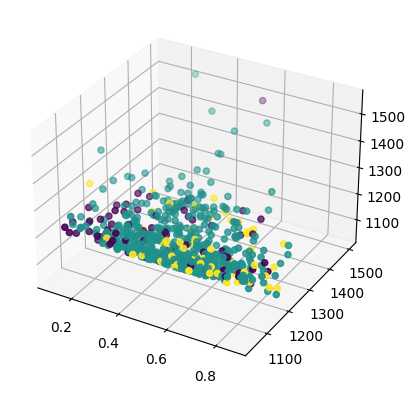

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
df_ = df[np.abs(df['score_diff']).isin([30,0,1])]#df_ = df[np.abs(df['score_diff']) == 30]
ax.scatter(df_['first_team_win_probability'], df_['first_team_rating'], df_['second_team_rating'] , c = df_['score_diff']) # plotting the clusters
#ax.xlabel("prob") # X-axis label
#plt.ylabel("r1") # Y-axis label
#plt.zlabel("r2")
plt.show()

In [10]:
def DisplayConfusionMatrix( vY, vYPred, lClasses, hAx = None ) -> None:
    #TODO: Add support for the `hAx` input`
    mConfMat = confusion_matrix(vY, vYPred, labels = lClasses)
    cmDisp = ConfusionMatrixDisplay(confusion_matrix = mConfMat, display_labels = lClasses)

    cmPlot = cmDisp.plot()
    hA = cmPlot.ax_
    hA.grid(False)
    plt.show()

def GenClassifierSummaryResults( vY, vYPred ) -> pd.Series:

    lLabels = ['Accuracy']#, 'F1', 'Precision', 'Recall' ]
    lScores = [accuracy_score]#, f1_score, precision_score, recall_score ]

    dScores = {}

    for ii, hScore in enumerate(lScores):
        dScores[lLabels[ii]] = hScore(vY, vYPred)
    
    return pd.Series(data = dScores)

In [11]:
numKFolds = 3 ; randomState = 42 ; seedNum = 512
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score , roc_auc_score

feats = ['first_team_win_probability' , 'first_team_rating', 'second_team_rating']
df_ = df[df['score_diff'].isin([30,0,1])]

mX = df_[feats]

vY = df_['t_']
hKFoldSplt = StratifiedGroupKFold(n_splits = numKFolds, shuffle = True, random_state = randomState)
for vTrainIdx, vTestIdx in hKFoldSplt.split(mX, vY, groups = df_['t_']):
    mXTrain, mXTest, vYTrain, vYTest = mX.iloc[vTrainIdx], mX.iloc[vTestIdx], vY.iloc[vTrainIdx], vY.iloc[vTestIdx]
    print(vYTrain.unique() , vYTest.unique())
    xgbModel =XGBClassifier(n_estimators=250, tree_method="hist", max_depth = 20,  random_state=seedNum, enable_categorical=True)
    xgbModel.fit(mXTrain, vYTrain)
    vYPred = xgbModel.predict(mXTest)
    DisplayConfusionMatrix(vYTest, vYPred, lClasses = xgbModel.classes_)
    print(GenClassifierSummaryResults(vYTest, vYPred))

[ 1 30] [0]


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [ 1 30]

In [ ]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

[  0 -16   3   9  26   7 -11 -12  -7   5 -13   6  24  -9  -8 -29  22  -5
 -30  18 -23 -19  23  13  14  -6  -4  11 -25   8  21  31 -14 -18  15 -10
 -24  -3   1  -2 -22 -17 -26  17  19  27  20  12 -31  28  29  16 -15  10
  30 -20]
[ 31 -16  22 -13 -18   7 -11 -21  -9 -31  20 -24  18  26  23  14  -1   8
 -19 -20  28 -22  -6 -14   5 -23  10  -3   0   2  27 -15  19  21 -17  -4
  11  17 -12  -7  24 -27  -8 -25 -30 -26 -29  12  16   4  13  29   6  15
   9 -10   1 -28  25   3  -2  30  -5]
{2, 4, 25, -28, -27, -21, -1}


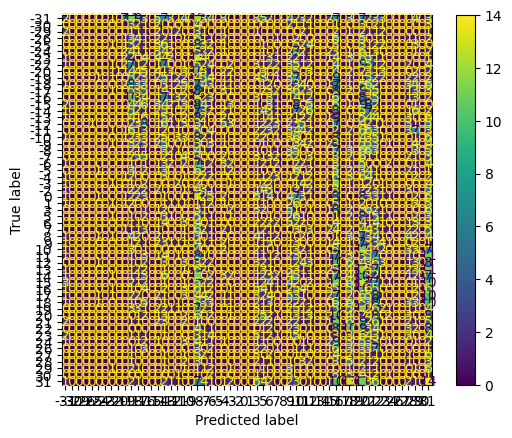

Accuracy    0.021927
dtype: float64
[  0 -16   3   9  26   7 -11 -12  -7   5 -13   6  24  -9  -8 -29  22  -5
 -30  18 -23 -19  23  13  14  -6  -4  11 -25   8  21  31 -14 -18  15 -10
 -24  -3   1  -2 -22 -17 -26  17  19  27  20  12 -31  28  29  16 -15  10
  30 -20]
[ 13   0   3  16 -13   9   7  -3  -7   5  24 -16  22 -30 -31  19  25 -23
   6 -21  -6  -4  11 -15  18 -11  -5 -24 -18 -10   1  21   8  -8 -25 -20
  -2 -14 -19  28  12  -9  27 -29  26  17 -26  20 -17 -22  15  10 -12 -27
  30  31  14   2   4  23  -1 -28  29]
{2, 4, 25, -28, -27, -21, -1}


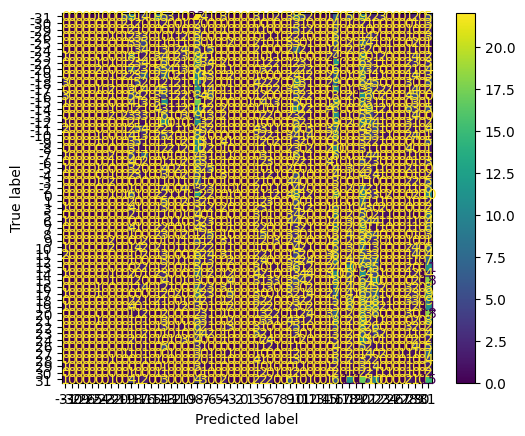

Accuracy    0.024637
dtype: float64
[  0 -16   3   9  26   7 -11 -12  -7   5 -13   6  24  -9  -8 -29  22  -5
 -30  18 -23 -19  23  13  14  -6  -4  11 -25   8  21  31 -14 -18  15 -10
 -24  -3   1  -2 -22 -17 -26  17  19  27  20  12 -31  28  29  16 -15  10
  30 -20]
[-31 -11  26 -19 -12   6  10 -27  -8 -29 -21 -26  -7  29  -5 -23  31   7
 -25  -6  15  14   0  11 -14  21  16   8  12 -24   2   4   5  13  25  -1
 -13 -20 -30 -15 -10  -4  22  -9  -2  23 -18  19 -16  18 -22   9  20  24
  30  -3   1  27 -28  17 -17  28   3]
{2, 4, 25, -28, -27, -21, -1}


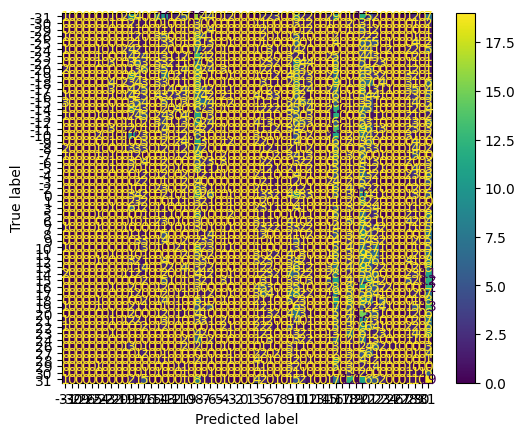

Accuracy    0.028332
dtype: float64


In [15]:
feats = ['first_team_win_probability' , 'first_team_rating', 'second_team_rating']

#mX = df[feats]
#vY = df['t2']
df_ = df#df[df['t_'].isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])]
mX = df_[feats]

vY = df_['t_']



hKFoldSplt = StratifiedKFold(n_splits = numKFolds, shuffle = True, random_state = randomState)
for vTrinIdx, vTestIdx in hKFoldSplt.split(mX, vY):

    mXTrain, mXTest, vYTrain, vYTest = mX.iloc[vTrainIdx], mX.iloc[vTestIdx], vY.iloc[vTrainIdx], vY.iloc[vTestIdx]
    print(vYTrain.unique() )
    print(vYTest.unique())
    print(set(vYTrain.unique()).symmetric_difference(set(vYTest.unique())))
    gnb = GaussianNB()
    vYPred = gnb.fit(mXTrain, vYTrain).predict(mXTest)#xgbModel =XGBClassifier(n_estimators=750, tree_method="hist", max_depth = 15,  random_state=seedNum, enable_categorical=True)
    #xgbModel.fit(mXTrain, vYTrain)
    #vYPred = xgbModel.predict(mXTest)
    DisplayConfusionMatrix(vYTest, vYPred, lClasses = gnb.classes_)
    print(GenClassifierSummaryResults(vYTest, vYPred))

In [20]:
mXTest , mXTest.iloc[[0,1]]

(       first_team_win_probability  first_team_rating  second_team_rating
 0                        0.376332             1238.0              1276.0
 2                        0.497884             1146.0              1141.0
 14                       0.651349             1188.0              1124.0
 16                       0.320922             1118.0              1192.0
 19                       0.764788             1274.0              1190.0
 ...                           ...                ...                 ...
 12164                    0.486655             1127.0              1142.0
 12169                    0.517759             1174.0              1171.0
 12172                    0.694739             1189.0              1107.0
 12175                    0.714823             1188.0              1103.0
 12176                    0.333136             1134.0              1195.0
 
 [4059 rows x 3 columns],
    first_team_win_probability  first_team_rating  second_team_rating
 0            

In [29]:
gnb.predict_proba(mXTest.iloc[[0,1]])[0].shape , gnb.classes_.shape , xgbModel.predict_proba(mXTest.iloc[[0,1]])[0].shape


((17,), (17,), (17,))

[  0 -16   3   9  26   7 -11 -12  -7   5 -13   6  24  -9  -8 -29  22  -5
 -30  18 -23 -19  23  13  14  -6  -4  11 -25   8  21  31 -14 -18  15 -10
 -24  -3   1  -2 -22 -17 -26  17  19  27  20  12 -31  28  29  16 -15  10
  30 -20]
[ 31 -16  22 -13 -18   7 -11 -21  -9 -31  20 -24  18  26  23  14  -1   8
 -19 -20  28 -22  -6 -14   5 -23  10  -3   0   2  27 -15  19  21 -17  -4
  11  17 -12  -7  24 -27  -8 -25 -30 -26 -29  12  16   4  13  29   6  15
   9 -10   1 -28  25   3  -2  30  -5]
{2, 4, 25, -28, -27, -21, -1}


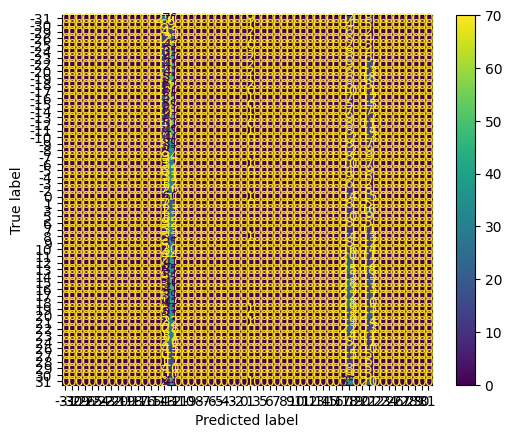

Accuracy    0.026115
dtype: float64


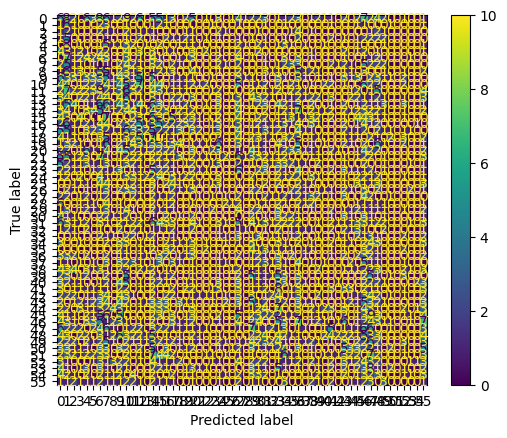

Accuracy    0.01897
dtype: float64
[  0 -16   3   9  26   7 -11 -12  -7   5 -13   6  24  -9  -8 -29  22  -5
 -30  18 -23 -19  23  13  14  -6  -4  11 -25   8  21  31 -14 -18  15 -10
 -24  -3   1  -2 -22 -17 -26  17  19  27  20  12 -31  28  29  16 -15  10
  30 -20]
[ 13   0   3  16 -13   9   7  -3  -7   5  24 -16  22 -30 -31  19  25 -23
   6 -21  -6  -4  11 -15  18 -11  -5 -24 -18 -10   1  21   8  -8 -25 -20
  -2 -14 -19  28  12  -9  27 -29  26  17 -26  20 -17 -22  15  10 -12 -27
  30  31  14   2   4  23  -1 -28  29]
{2, 4, 25, -28, -27, -21, -1}


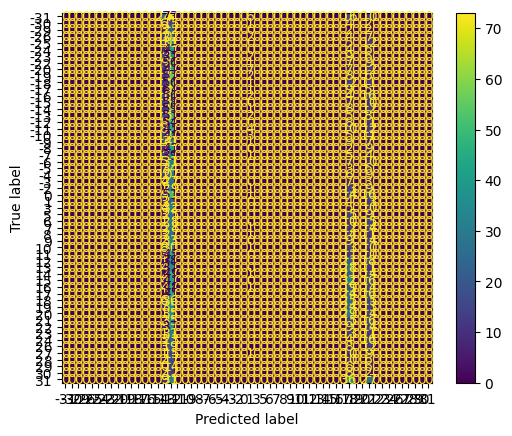

Accuracy    0.0271
dtype: float64


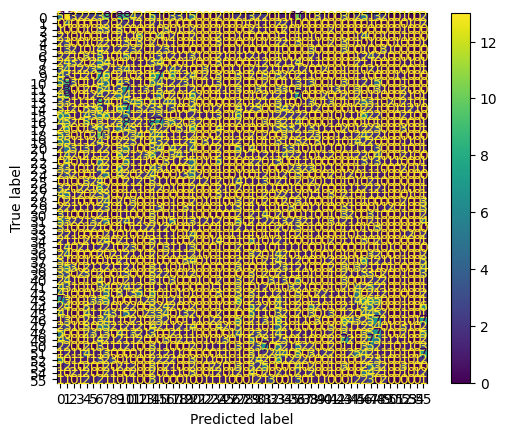

Accuracy    0.018724
dtype: float64
[  0 -16   3   9  26   7 -11 -12  -7   5 -13   6  24  -9  -8 -29  22  -5
 -30  18 -23 -19  23  13  14  -6  -4  11 -25   8  21  31 -14 -18  15 -10
 -24  -3   1  -2 -22 -17 -26  17  19  27  20  12 -31  28  29  16 -15  10
  30 -20]
[-31 -11  26 -19 -12   6  10 -27  -8 -29 -21 -26  -7  29  -5 -23  31   7
 -25  -6  15  14   0  11 -14  21  16   8  12 -24   2   4   5  13  25  -1
 -13 -20 -30 -15 -10  -4  22  -9  -2  23 -18  19 -16  18 -22   9  20  24
  30  -3   1  27 -28  17 -17  28   3]
{2, 4, 25, -28, -27, -21, -1}


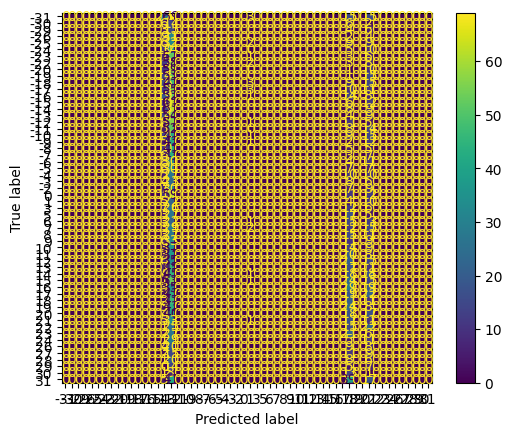

Accuracy    0.025376
dtype: float64


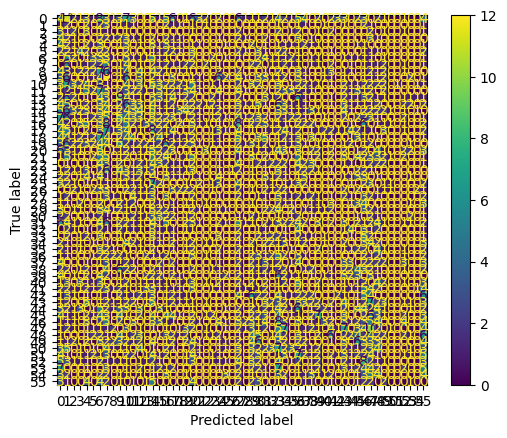

Accuracy    0.020448
dtype: float64


In [43]:
from sklearn.naive_bayes import MultinomialNB#GaussianNB
feats = ['first_team_win_probability' , 'first_team_rating', 'second_team_rating']

#mX = df[feats]
#vY = df['t2']
df_ = df#df[df['t_'].isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])]
mX = df_[feats]

vY = df_['t_']



hKFoldSplt = StratifiedKFold(n_splits = numKFolds, shuffle = True, random_state = randomState)
for vTrinIdx, vTestIdx in hKFoldSplt.split(mX, vY):

    mXTrain, mXTest, vYTrain, vYTest = mX.iloc[vTrainIdx], mX.iloc[vTestIdx], vY.iloc[vTrainIdx], vY.iloc[vTestIdx]
    print(vYTrain.unique() )
    print(vYTest.unique())
    print(set(vYTrain.unique()).symmetric_difference(set(vYTest.unique())))
    gnb = MultinomialNB()#GaussianNB()
    vYPred = gnb.fit(mXTrain, vYTrain).predict(mXTest)#xgbModel =XGBClassifier(n_estimators=750, tree_method="hist", max_depth = 15,  random_state=seedNum, enable_categorical=True)
    #xgbModel.fit(mXTrain, vYTrain)
    #vYPred = xgbModel.predict(mXTest)
    DisplayConfusionMatrix(vYTest, vYPred, lClasses = gnb.classes_)
    print(GenClassifierSummaryResults(vYTest, vYPred))

    vYTrain = le.fit_transform(vYTrain)
    vYTest = le.fit_transform(vYTest)
    train = np.unique(vYTrain) ; test = np.unique(vYTest)
    #print(train )
    #print(test)
    #print(set(train).symmetric_difference(set(test)))
    
    xgbModel =XGBClassifier(n_estimators=450, tree_method="hist", max_depth = 7,  random_state=seedNum, enable_categorical=True)
    xgbModel.fit(mXTrain, vYTrain)
    vYPred = xgbModel.predict(mXTest)
    DisplayConfusionMatrix(vYTest, vYPred, lClasses = xgbModel.classes_)
    print(GenClassifierSummaryResults(vYTest, vYPred))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]
{56, 57, 58, 59, 60, 61, 62}


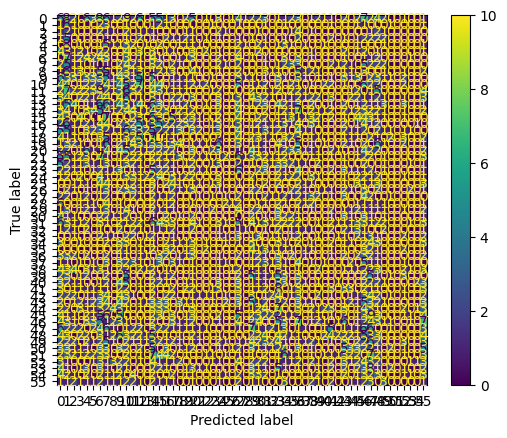

Accuracy    0.01897
dtype: float64
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]
{56, 57, 58, 59, 60, 61, 62}


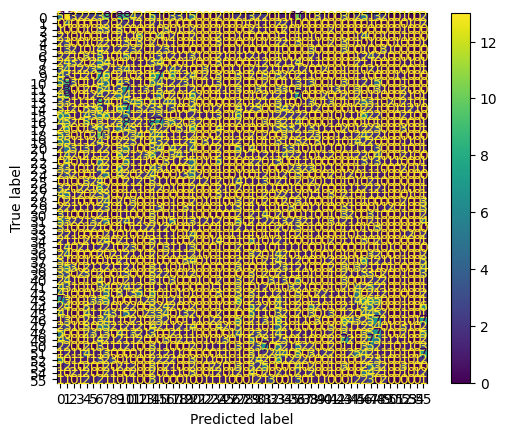

Accuracy    0.018724
dtype: float64
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]
{56, 57, 58, 59, 60, 61, 62}


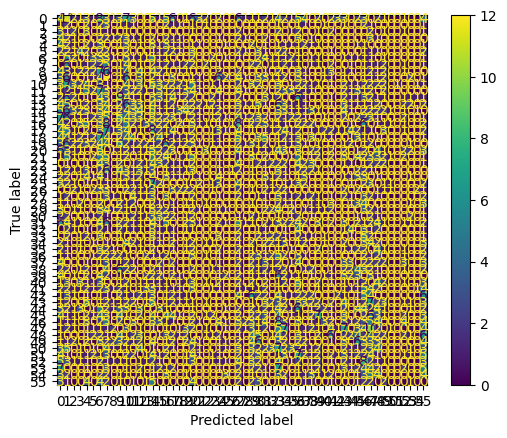

Accuracy    0.020448
dtype: float64


In [41]:
#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, stratify = labels)
feats = ['first_team_win_probability' , 'first_team_rating', 'second_team_rating']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


#mX = df[feats]
#vY = df['t2']
df_ = df#df[df['t_'].isin([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])]
mX = df_[feats]

vY = df_['t_']


hKFoldSplt = StratifiedKFold(n_splits = numKFolds, shuffle = True, random_state = randomState)
for vTrinIdx, vTestIdx in hKFoldSplt.split(mX, vY):

    mXTrain, mXTest, vYTrain, vYTest = mX.iloc[vTrainIdx], mX.iloc[vTestIdx], vY.iloc[vTrainIdx], vY.iloc[vTestIdx]
    vYTrain = le.fit_transform(vYTrain)
    vYTest = le.fit_transform(vYTest)
    train = np.unique(vYTrain) ; test = np.unique(vYTest)
    print(train )
    print(test)
    print(set(train).symmetric_difference(set(test)))
    
    xgbModel =XGBClassifier(n_estimators=450, tree_method="hist", max_depth = 7,  random_state=seedNum, enable_categorical=True)
    xgbModel.fit(mXTrain, vYTrain)
    vYPred = xgbModel.predict(mXTest)
    DisplayConfusionMatrix(vYTest, vYPred, lClasses = xgbModel.classes_)
    print(GenClassifierSummaryResults(vYTest, vYPred))

In [ ]:
from numpy import array
from sklearn.model_selection import KFold

#    print('train: %s, test: %s' % (data[train], data[test]))



kfold = KFold(3)
#for train, test in kfold.split(data)
#hKFoldSplt = StratifiedKFold(n_splits = numKFolds, shuffle = True, random_state = randomState)
for vTrinIdx, vTestIdx in kfold.split(mX, vY):

    mXTrain, mXTest, vYTrain, vYTest = mX.iloc[vTrainIdx], mX.iloc[vTestIdx], vY.iloc[vTrainIdx], vY.iloc[vTestIdx]
    print(vYTrain.unique() )
    print(vYTest.unique())
    print(set(vYTrain.unique()).symmetric_difference(set(vYTest.unique())))

    xgbModel =XGBClassifier(n_estimators=250, tree_method="hist", max_depth = 20,  random_state=seedNum, enable_categorical=True)
    xgbModel.fit(mXTrain, vYTrain)
    vYPred = xgbModel.predict(mXTest)
    DisplayConfusionMatrix(vYTest, vYPred, lClasses = xgbModel.classes_)
    print(GenClassifierSummaryResults(vYTest, vYPred))    

In [ ]:

li1 = [10, 15, 20, 25, 30, 35, 40]
li2 = [25, 40, 35,1000]
 
set_dif = set(li1).symmetric_difference(set(li2))
temp3 = list(set_dif)
print(temp3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

print(regr.predict([[0, 0, 0, 0]]))
print(regr.predict_proba([[0, 0, 0, 0]]))

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
z = (np.sin(x **2) + np.cos(y **2) )
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z)
 
# show plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# set up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()

In [ ]:
df

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# set up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = df['first_team_win_probability']#np.arange(4)
_y = df['rank_diff']#np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = df['score_diff']#top = x + y
bottom = np.zeros_like(top)
width = depth = 0.1

#ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
#ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
df_ = df[np.abs(df['score_diff']).isin([30,0,1])]#df_ = df[np.abs(df['score_diff']) == 30]
ax.scatter(df['first_team_win_probability'], df['rank_diff'], df['score_diff'] ) # plotting the clusters
ax.xlabel("prob") # X-axis label
ax.ylabel("r_diff") # Y-axis label
plt.zlabel("score_diff")
plt.show()

In [ ]:
df[['first_team_win_probability','score_diff']].mean() , df[['first_team_win_probability','score_diff']].cov() , df[['first_team_win_probability','score_diff']].cov().to_numpy()
#ax.xlabel("prob") # X-axis label
#ax.ylabel("r_diff") # Y-axis label
#plt.zlabel("score_diff")
#plt.show()

In [ ]:
df['rank_diff_norm']=(df['rank_diff']-df['rank_diff'].mean())/df['rank_diff'].std()
df['score_diff_norm']=(df['score_diff']-df['score_diff'].mean())/df['score_diff'].std()

In [ ]:

from pingouin import multivariate_normality
import pandas as pd
import numpy as np
#data = pd.DataFrame({'a': np.random.normal(size=100),
#                         'b': np.random.normal(size=100),
#                         'c': np.random.normal(size=100),
#                         'd': np.random.normal(size=100),
#                         'e': np.random.normal(size=100)})

data = df[['first_team_win_probability' , 'rank_diff_norm' , 'score_diff_norm']]#data = df[['first_team_win_probability' , 'rank_diff' , 'score_diff']]  
# perform the Multivariate Normality Test
multivariate_normality(data, alpha=.05)

In [ ]:
!pip install pingouin

In [ ]:
df[['first_team_win_probability' ,  'score_diff_norm']].to_numpy()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats
size = 30000
x = np.arange(size)
y = scipy.int_(np.round_(scipy.stats.vonmises.rvs(5,size=size)*47))
#h = plt.hist(y, bins=range(48))

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']


dist = getattr(scipy.stats, 'multivariate_normal')
params = dist.fit(df[['first_team_win_probability' ,  'score_diff_norm']].to_numpy())
params


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

In [ ]:
numKFolds = 3 ; randomState = 42 ; seedNum = 512



feats = ['first_team_win_probability' , 'second_team_win_probability' , 'first_team_rating', 'second_team_rating' , 'rank_diff']#feats = ['first_team_win_probability' , 'first_team_rating', 'second_team_rating']

df_ = df#df[df['t_'].isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])]
mX = df_[feats]

vY = df_['score_diff_']



hKFoldSplt = StratifiedKFold(n_splits = numKFolds, shuffle = True, random_state = randomState)
for vTrainIdx, vTestIdx in hKFoldSplt.split(mX, vY):

    mXTrain, mXTest, vYTrain, vYTest = mX.iloc[vTrainIdx], mX.iloc[vTestIdx], vY.iloc[vTrainIdx], vY.iloc[vTestIdx]
    #print(vYTrain.unique() ) 
    #print(vYTest.unique())
    print(set(vYTrain.unique()).symmetric_difference(set(vYTest.unique())))
    gnb = GaussianNB()
    vYPred = gnb.fit(mXTrain, vYTrain).predict(mXTest)#xgbModel =XGBClassifier(n_estimators=750, tree_method="hist", max_depth = 15,  random_state=seedNum, enable_categorical=True)
    vYPred_ = gnb.predict(mXTrain)
    #xgbModel.fit(mXTrain, vYTrain)
    #vYPred = xgbModel.predict(mXTest)
    #DisplayConfusionMatrix(vYTest, vYPred, lClasses = gnb.classes_)
    print(accuracy_score(vYTest, vYPred))#print(GenClassifierSummaryResults(vYTest, vYPred))
    print(GenClassifierSummaryResults(vYTrain, vYPred_))
    #print(np.unique(gnb.predict(mXTest)))